In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
def get_diffTimeFrame(data, timeframe, offsetVal):
    ohlc_dict = {'Open':'first', 'High':'max', 'Low':'min', 'Close': 'last'}
    result = data.resample(timeframe, origin=offsetVal, on='Date').apply(ohlc_dict)
    result['Returns%'] = (result['Close'] - result['Open'])*100/result['Open'];
    return result.dropna()

1640
159


(array([1.3000e+01, 4.9000e+01, 2.6000e+01, 1.6000e+01, 5.1000e+01,
        1.2800e+02, 3.2200e+02, 1.0600e+03, 4.2760e+03, 1.3191e+04,
        1.3077e+04, 5.0860e+03, 1.6980e+03, 6.0000e+02, 2.2500e+02,
        1.1600e+02, 6.1000e+01, 3.0000e+01, 1.2000e+01, 1.6000e+01]),
 array([-100.,  -90.,  -80.,  -70.,  -60.,  -50.,  -40.,  -30.,  -20.,
         -10.,    0.,   10.,   20.,   30.,   40.,   50.,   60.,   70.,
          80.,   90.,  100.]),
 <a list of 20 Patch objects>)

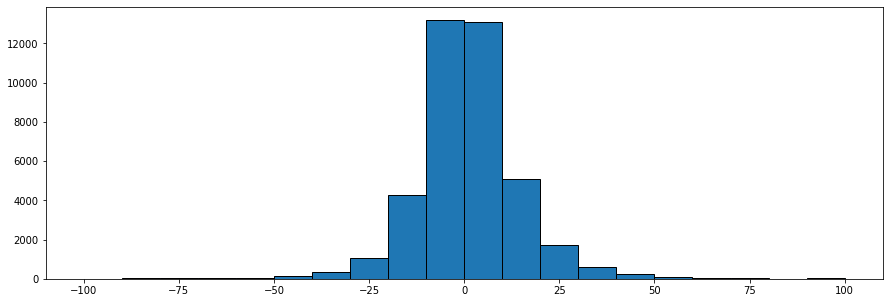

In [24]:
import pandas as pd
def monthly_data(link):
  df=pd.read_csv(link, parse_dates=['Date'])
  df = df[df.Date > "2000-01-01"]
  df_monthly=get_diffTimeFrame(df, 'M', 1);
  lis = list(link.split("/"))
  if(len(df_monthly)==252):
    #return df_monthly
    df_monthly.to_csv("/content/drive/MyDrive/NeuroEcon Project/My_Cleaned_Data/"+lis[len(lis)-1])
import os
path = "/content/drive/MyDrive/NeuroEcon Project/Stock Data/stock_data"
dir_list = os.listdir(path)
print(len(dir_list))
#basically getting all the tickers with historic data going back to 2000!
for i in dir_list:
  monthly_data(path+"/"+i)
import os
path = "/content/drive/MyDrive/NeuroEcon Project/My_Cleaned_Data"
dir_list = os.listdir(path)
print(len(dir_list))
import pandas as pd
hist=[]
for i in dir_list:
  df=pd.read_csv(path+"/"+i)
  l=df["Returns%"].tolist()
  for j in l:
    hist.append(j)
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)
plt.hist(hist,bins=20,range=(-100,100),edgecolor = "black")

In [25]:
def formation_period(t1,t2,link):
  df=pd.read_csv(link)
  df=df[df.Date > t1]
  df=df[df.Date < t2]

In [26]:
for i in dir_list[:1]:
  df=pd.read_csv(path+"/"+i)
  df=df[df.Date > "2000-01-01"]
  df=df[df.Date < "2002-01-01"]
  print(df)

          Date      Open      High      Low    Close   Returns%
0   2000-01-31  15625.00  16875.25  7127.00  7221.70 -53.781120
1   2000-02-29   7250.00  10800.00  7150.00  8779.40  21.095172
2   2000-03-31   9099.00  13931.90  8511.00  8970.15  -1.416090
3   2000-04-30   8501.00  10600.90  6671.00  8121.65  -4.462416
4   2000-05-31   8250.00   8740.00  5525.05  6998.75 -15.166667
5   2000-06-30   6950.00   8950.00  6833.00  8310.40  19.574101
6   2000-07-31   8390.00   8812.00  6352.00  6761.25 -19.412992
7   2000-08-31   6840.00   8603.00  6255.60  8326.80  21.736842
8   2000-09-30   8400.00   8949.00  6975.00  7361.25 -12.366071
9   2000-10-31   7325.00   7725.00  6120.00  7132.95  -2.621843
10  2000-11-30   7349.90   8035.90  7160.00  7184.15  -2.255133
11  2000-12-31   7150.00   8041.90  5422.00  5694.10 -20.362238
12  2001-01-31   5705.00   6939.70  5483.70  6792.75  19.066608
13  2001-02-28   6761.00   6910.00  5536.30  6241.65  -7.681556
14  2001-03-31   6250.00   6250.00  3765

In [27]:
#portfolio formation , yr=1,2,5
one_year=[["01-01-2000","31-12-2000"],
["01-01-2001","31-12-2001"],
["01-01-2002","31-12-2002"],
["01-01-2003","31-12-2003"],
["01-01-2004","31-12-2004"],
["01-01-2005","31-12-2005"],
["01-01-2006","31-12-2006"],
["01-01-2007","31-12-2007"],
["01-01-2008","31-12-2008"],
["01-01-2009","31-12-2009"],
["01-01-2010","31-12-2010"],
["01-01-2011","31-12-2011"],
["01-01-2012","31-12-2012"],
["01-01-2013","31-12-2013"],
["01-01-2014","31-12-2014"],
["01-01-2015","31-12-2015"],
["01-01-2016","31-12-2016"],
["01-01-2017","31-12-2017"],
["01-01-2018","31-12-2018"],
["01-01-2019","31-12-2019"],
["01-01-2020","31-12-2020"]]
two_year=[["01-01-2000","31-12-2001"],
["01-01-2002","31-12-2003"],
["01-01-2004","31-12-2005"],
["01-01-2006","31-12-2007"],
["01-01-2008","31-12-2009"],
["01-01-2010","31-12-2011"],
["01-01-2012","31-12-2013"],
["01-01-2014","31-12-2015"],
["01-01-2016","31-12-2017"],
["01-01-2018","31-12-2019"]]
five_year=[["01-01-2000","31-12-2004"],
["01-01-2005","31-12-2009"],
["01-01-2010","31-12-2014"],
["01-01-2015","31-12-2019"]]

In [28]:
from datetime import datetime

def diff_month(d2, d1):
    d1=datetime.strptime(d1, '%d-%m-%Y').date()
    d2=datetime.strptime(d2,'%d-%m-%Y').date()
    return (d1.year - d2.year) * 12 + d1.month - d2.month + 1
diff_month(one_year[0][0],one_year[1][1])

24

In [51]:
import pandas as pd
import os.path
def industry(strx):
  print(strx)
  df=pd.read_csv("/content/drive/MyDrive/NeuroEcon Project/Equity.csv")
  ind=df.groupby("Industry New Name")
  l=ind.get_group(strx)["Issuer Name"].tolist()
  indlist=[]
  for i in l:
    indlist.append(i+".csv")
  return indlist
def valid_stocks(date_interval,date_test,ind="None"):
  start_date=date_interval[0]
  end_date=date_interval[1]
  test_date=date_test[1]
  print(start_date,test_date)
  path = "/content/drive/MyDrive/NeuroEcon Project/Stock Data/stock_data"
  if(ind=="None"):
    dir_list = os.listdir(path)
  else:
    dir_list=industry(ind)
  filled_data_stocks={}
  for i in dir_list:
    if(os.path.exists(path+"/"+i)):
      df=pd.read_csv(path+"/"+i,parse_dates=['Date'])
      df=df[df.Date > start_date]
      df=df[df.Date < test_date]
      df_monthly=get_diffTimeFrame(df, 'M', 1);
      if(len(df_monthly)==diff_month(start_date,test_date)):
        filled_data_stocks[i]=df_monthly
  return filled_data_stocks

In [30]:
x=valid_stocks(one_year[0],one_year[1])

01-01-2000 31-12-2001


In [31]:
x['VIDEOIND.csv']

,Open,High,Low,Close,Returns%
Date,,,,,
2000-01-31,17.25,21.00,12.30,13.10,-24.057971
2000-02-29,12.50,80.75,12.50,80.75,546.000000
2000-03-31,87.25,138.55,61.25,102.35,17.306590
2000-04-30,103.00,110.50,40.00,41.00,-60.194175
2000-05-31,40.00,51.80,29.10,51.80,29.500000
2000-06-30,55.95,103.75,55.95,57.75,3.217158
2000-07-31,56.20,61.60,36.80,46.20,-17.793594
2000-08-31,45.00,47.00,38.00,38.00,-15.555556
2000-09-30,36.55,52.00,35.00,38.20,4.514364


In [95]:
import math
from heapq import nlargest
def return_avg(lst):
  sum=0
  for i in lst:
    sum+=i[1]
  return sum/len(lst)

def cumulative_excess(date_interval,date_test,ind="None"):
  start_date=date_interval[0]
  end_date=date_interval[1]
  test_date=date_test[1]
  filled_data=valid_stocks(date_interval,date_test,ind)
  df=pd.read_csv("/content/drive/MyDrive/NeuroEcon Project/Stock Data/index_data/NIFTY_50.csv",parse_dates=['Date'])
  df=df[df.Date > start_date]
  df=df[df.Date < test_date]
  df_monthly=get_diffTimeFrame(df, 'M', 1);
  cum_returns={}
  time=diff_month(start_date,test_date)
  for i in filled_data:
    cum=0
    for j in range(int(time/2)):
      #date1=filled_data[i].index[j]
      #date2=df_monthly.index[j]
      #dates are perfectly synced
      cum+=(filled_data[i]["Returns%"][j]-df_monthly["Returns%"][j])
      #print(date1,date2)
    if(math.isinf(cum)!=True):
      cum_returns[i]=cum
  cum_returns=sorted(cum_returns.items(), key=lambda y:y[1])
  top_ten=int(len(cum_returns)/4)
  cum_returns=list(cum_returns)
  losing=cum_returns[:top_ten]
  winning = cum_returns[-top_ten:]
  #copied
  if(len(winning)==0):
      return {"Winning":[],"Losing":[],"ARWinning":[],"ARLosing":[],"CARWinning":[],"CARLosing":[],"ini_car_win":0,"change_win":0,"change_lose":0}
  ar_winning=[]
  ar_losing=[]
  print("winning protfolio len ",len(winning)," losing is ",len(losing))
  for i in range(int(time/2)):
    c=0
    for j in winning:
      #date1=filled_data[j[0]].index[i]
      #date2=df_monthly.index[i]
      #print(date1,date2,j[0])
      #perfectly lined up
      c+=filled_data[j[0]]["Returns%"][i]-df_monthly["Returns%"][i]
    ar_winning.append(c/len(winning))
  for i in range(int(time/2)):
    c=0
    for j in losing:
      #date1=filled_data[j[0]].index[i]
      #date2=df_monthly.index[i]
      #print(date1,date2,j[0])
      #perfectly lined up
      c+=filled_data[j[0]]["Returns%"][i]-df_monthly["Returns%"][i]
    ar_losing.append(c/len(winning))
  #print(car_winning)
  #print(car_losing)
  car_winning=[]
  car_losing=[]
  #c[0]=ar[0] , c[1]=ar[0]+ar[1]
  sumx=0
  for i in ar_winning:
    sumx+=i
    car_winning.append(sumx)
  sumy=0
  for i in ar_losing:
    sumy+=i
    car_losing.append(sumy)
  ini_car_win=sum(car_winning)/len(car_winning)
  ini_car_lose=sum(car_losing)/len(car_losing)
  print("Winning CAR at End of formation period "+date_interval[1] +" is ",sum(car_winning)/len(car_winning))
  print("Losing CAR at End of formation period "+date_interval[1] +" is ",sum(car_losing)/len(car_losing))
  #generating CAR values
  ar_winning=[]
  ar_losing=[]
  for i in range(int(time/2),time,1):
    c=0
    for j in winning:
      #date1=filled_data[j[0]].index[i]
      #date2=df_monthly.index[i]
      #print(date1,date2,j[0])
      #perfectly lined up
      c+=filled_data[j[0]]["Returns%"][i]-df_monthly["Returns%"][i]
    ar_winning.append(c/len(winning))
  for i in range(int(time/2),time,1):
    c=0
    for j in losing:
      #date1=filled_data[j[0]].index[i]
      #date2=df_monthly.index[i]
      #print(date1,date2,j[0])
      #perfectly lined up
      c+=filled_data[j[0]]["Returns%"][i]-df_monthly["Returns%"][i]
    ar_losing.append(c/len(winning))
  #print(car_winning)
  #print(car_losing)
  car_winning=[]
  car_losing=[]
  #c[0]=ar[0] , c[1]=ar[0]+ar[1]
  sumx=0
  for i in ar_winning:
    sumx+=i
    car_winning.append(sumx)
  sumy=0
  for i in ar_losing:
    sumy+=i
    car_losing.append(sumy)
  fin_car_win=sum(car_winning)/len(car_winning)-ini_car_win
  fin_car_lose=sum(car_losing)/len(car_losing)-ini_car_lose
  print("Winning CAR at End of Testing period "+date_test[1] +" is ",sum(car_winning)/len(car_winning))
  print("Losing CAR at End of Testing period "+date_test[1] +" is ",sum(car_losing)/len(car_losing))
  return {"Winning":winning,"Losing":losing,"ARWinning":ar_winning,"ARLosing":ar_losing,"CARWinning":car_winning,"CARLosing":car_losing,"ini_car_win":fin_car_win,"change_win":ini_car_lose,"change_lose":fin_car_lose}

In [33]:
x=cumulative_excess(one_year[0],one_year[1])

01-01-2000 31-12-2001
Winning CAR at End of formation period 31-12-2000 is  34.49979085486777
Losing CAR at End of formation period 31-12-2000 is  -67.39745734468741
Winning CAR at End of Testing period 31-12-2001 is  -3.2366642031467774
Losing CAR at End of Testing period 31-12-2001 is  -14.559642279127944


In [34]:
x

{'Winning': [('IDBI.csv', 28.3544388187185),
  ('GFLLIMITED.csv', 28.37782859283159),
  ('EASTSILK.csv', 29.27767231703653),
  ('MADRASFERT.csv', 30.844726226500626),
  ('INDSWFTLAB.csv', 30.94352052740975),
  ('EUROTEXIND.csv', 31.189072872434764),
  ('3MINDIA.csv', 31.44240075982296),
  ('CANFINHOME.csv', 33.17247253507187),
  ('EIHOTEL.csv', 33.43026126941145),
  ('TATASTLLP.csv', 33.72680380920655),
  ('GTNIND.csv', 33.926669998394075),
  ('PENINLAND.csv', 35.695537972494414),
  ('RELCAPITAL.csv', 36.468595361831646),
  ('BIOFILCHEM.csv', 36.68253440356699),
  ('BRITANNIA.csv', 36.82955398564866),
  ('GODFRYPHLP.csv', 38.17172655636412),
  ('KARURVYSYA.csv', 38.9616883205768),
  ('HINDZINC.csv', 39.861515050015626),
  ('SOUTHBANK.csv', 42.305524340282716),
  ('MAHSEAMLES.csv', 44.16317654447212),
  ('ABAN.csv', 47.21771252750973),
  ('HEG.csv', 47.90610071663975),
  ('MOTHERSUMI.csv', 48.488305216997446),
  ('ITC.csv', 49.26408803279463),
  ('RELIANCE.csv', 49.87659851103683),
  ('

In [48]:
#calc ACAR
def acar_values(one_year,ind="None"):
  ar_win=[]
  ar_lose=[]
  car_win=[]
  car_lose=[]
  win_change=[]
  lose_change=[]
  for i in range(len(one_year)-1):
    x=cumulative_excess(one_year[i],one_year[i+1],ind)
    ar_win.append(x["ARWinning"])
    ar_lose.append(x["ARLosing"])
    car_win.append(x["CARWinning"])
    car_lose.append(x["CARLosing"])
    win_change.append(x["change_win"])
    lose_change.append(x["change_lose"])

  acar_win=[]
  acar_lose=[]
  for i in range(len(car_win[0])):
    x=[j[i] for j in car_win]
    acar_win.append(sum(x)/len(x))
  for i in range(len(car_lose[0])):
    x=[j[i] for j in car_lose]
    acar_lose.append(sum(x)/len(x))
  return {"ACARWinning":acar_win,"ACARLosing":acar_lose,"ChangeARP":win_change,"ChangeARL":lose_change,"CARW":car_win,"CARL":car_lose}

In [36]:
  def plotar(x):
    import matplotlib.pyplot as plt
    import numpy as np
    fig = plt.figure()
    fig.set_figheight(5)
    fig.set_figwidth(15)
    plt.plot(x["ChangeARP"],label = "Winning AR")
    xax = np.arange(0,len(x["ChangeARP"]),len(x["ChangeARP"])/4- 1)
    print(xax)
    plt.plot(x["ChangeARL"],label = "Losing AR")
    plt.xticks(xax)
    plt.legend()
    plt.show()

  def plotacar(x):
    import matplotlib.pyplot as plt
    import numpy as np
    fig = plt.figure()
    fig.set_figheight(5)
    fig.set_figwidth(15)
    plt.plot(x["ACARWinning"],label = "Winning ACAR")
    plt.plot(x["ACARLosing"],label = "Losing ACAR")
    plt.legend()
    plt.show()

In [37]:
import math
from scipy.stats import t
def tstat(x):
  car_w=x["CARW"]
  car_l=x["CARL"]
  acar_w=x["ACARWinning"]
  acar_l=x["ACARLosing"]
  t_val=[]
  t_val_profit=[]
  t_val_loss=[]
  print("average winning acar = ",sum(acar_w)/len(acar_w)," and losing acar = ",sum(acar_l)/len(acar_l))
  for j in range(len(car_w[0])):
    sx=0
    for i in range(len(car_w)):
      sx+=(car_w[i][j]-acar_w[j])*(car_w[i][j]-acar_w[j])+(car_l[i][j]-acar_l[j])*(car_l[i][j]-acar_l[j])
    temp=sx/(2*(len(car_w)-1))
    d=2*temp/(len(car_w))
    tw=(acar_l[j]-acar_w[j])/(100*math.sqrt(d))
    p=1-t.cdf(tw, df = len(car_w)-1)
    t_val.append([tw,p])
  for j in range(len(car_w[0])):
    sx=0
    for i in range(len(car_w)):
      sx+=(car_w[i][j]-acar_w[j])*(car_w[i][j]-acar_w[j])
    temp=sx/(2*(len(car_w)-1))
    d=2*temp/(len(car_w))
    tw=(acar_w[j])/(100*math.sqrt(d))
    p=1-t.cdf(tw, df = len(car_w)-1)
    t_val_profit.append([tw,p])
  for j in range(len(car_w[0])):
    sx=0
    for i in range(len(car_w)):
      sx+=(car_l[i][j]-acar_l[j])*(car_l[i][j]-acar_l[j])
    temp=sx/(2*(len(car_w)-1))
    d=2*temp/(len(car_w))
    tw=(acar_l[j])/(100*math.sqrt(d))
    p=1-t.cdf(tw, df = len(car_w)-1)
    t_val_loss.append([tw,p])
  for i in range(len(t_val)):
    print("the month is ",i,"acar_w is ",acar_w[i]," acar_l is ",acar_l[i]," T_val is ",t_val[i]," t_profit ",t_val_profit[i]," t_loss ",t_val_loss[i])
  return {"acw":acar_w,"acl":acar_l,"t_Val":t_val,"t_profit":t_val_profit,"t_loss":t_val_loss}

In [38]:
x=acar_values(one_year)

01-01-2000 31-12-2001
Winning CAR at End of formation period 31-12-2000 is  34.49979085486777
Losing CAR at End of formation period 31-12-2000 is  -67.39745734468741
Winning CAR at End of Testing period 31-12-2001 is  -3.2366642031467774
Losing CAR at End of Testing period 31-12-2001 is  -14.559642279127944
01-01-2001 31-12-2002
Winning CAR at End of formation period 31-12-2001 is  31.094557236426443
Losing CAR at End of formation period 31-12-2001 is  -47.50831125244432
Winning CAR at End of Testing period 31-12-2002 is  27.004385252983568
Losing CAR at End of Testing period 31-12-2002 is  22.7318496120661
01-01-2002 31-12-2003
Winning CAR at End of formation period 31-12-2002 is  93.34781326150024
Losing CAR at End of formation period 31-12-2002 is  -20.997576737116162
Winning CAR at End of Testing period 31-12-2003 is  11.991460315248899
Losing CAR at End of Testing period 31-12-2003 is  -5.522174463271507
01-01-2003 31-12-2004
Winning CAR at End of formation period 31-12-2003 is  5

average winning acar =  -2.185461601535578  and losing acar =  -6.639711074695955
the month is  0 acar_w is  -1.6368153489254547  acar_l is  -3.6973310437407383  T_val is  [-0.009526147543587767, 0.5037506685236308]  t_profit  [-0.014529988310613622, 0.5057206776109913]  t_loss  [-0.020023364506560042, 0.5078832409449343]
the month is  1 acar_w is  -3.637052380561318  acar_l is  -7.1590060267506015  T_val is  [-0.0115755945108701, 0.5045575494581332]  t_profit  [-0.018713486037722715, 0.5073676046028732]  t_loss  [-0.03058217673323544, 0.512039139137996]
the month is  2 acar_w is  -5.902946496815966  acar_l is  -11.285014159044433  T_val is  [-0.015303678316055596, 0.5060252667469615]  t_profit  [-0.025635591540541094, 0.5100923329165898]  t_loss  [-0.04245347520972815, 0.5167099150458765]
the month is  3 acar_w is  -0.3164892336036905  acar_l is  -5.767828486904209  T_val is  [-0.013143043737618735, 0.5051746512591996]  t_profit  [-0.0011725085200687824, 0.5004616514423105]  t_loss  [

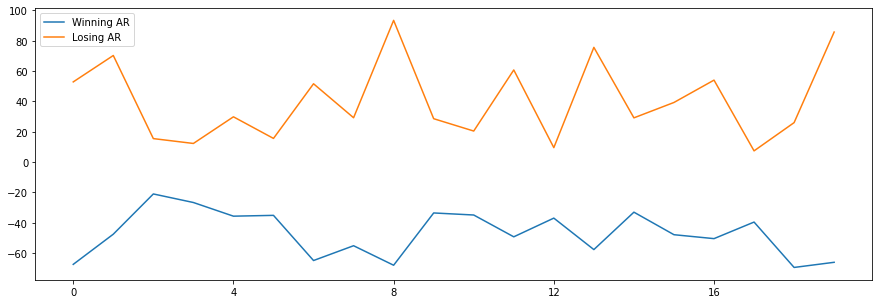

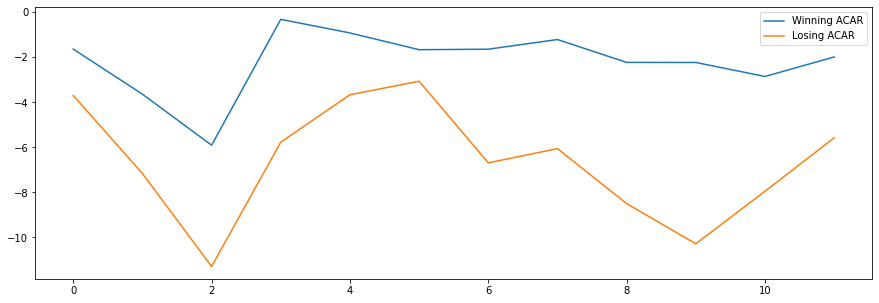

In [39]:
a1=tstat(x)
plotar(x)
plotacar(x)

In [40]:
y=acar_values(two_year)

01-01-2000 31-12-2003
Winning CAR at End of formation period 31-12-2001 is  43.98244637487486
Losing CAR at End of formation period 31-12-2001 is  -85.09247007975051
Winning CAR at End of Testing period 31-12-2003 is  37.7230167702212
Losing CAR at End of Testing period 31-12-2003 is  36.82799650433997
01-01-2002 31-12-2005
Winning CAR at End of formation period 31-12-2003 is  107.41420299492772
Losing CAR at End of formation period 31-12-2003 is  -25.2304643857767
Winning CAR at End of Testing period 31-12-2005 is  7.30679789865346
Losing CAR at End of Testing period 31-12-2005 is  -3.141776484970378
01-01-2004 31-12-2007
Winning CAR at End of formation period 31-12-2005 is  69.98846333933933
Losing CAR at End of formation period 31-12-2005 is  -39.443474819052014
Winning CAR at End of Testing period 31-12-2007 is  -18.142353446630835
Losing CAR at End of Testing period 31-12-2007 is  -25.926310197368036
01-01-2006 31-12-2009
Winning CAR at End of formation period 31-12-2007 is  37.65

[0.   1.25 2.5  3.75 5.   6.25 7.5  8.75]


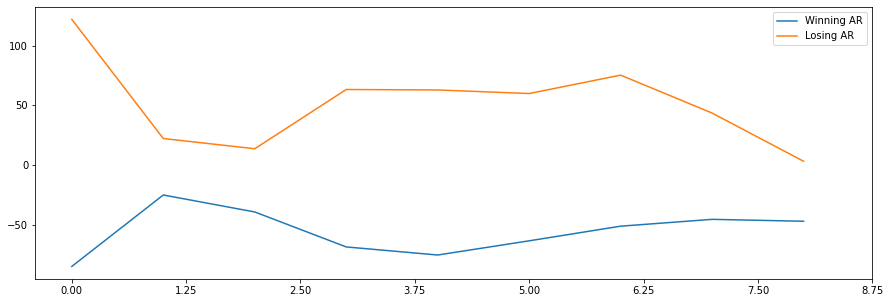

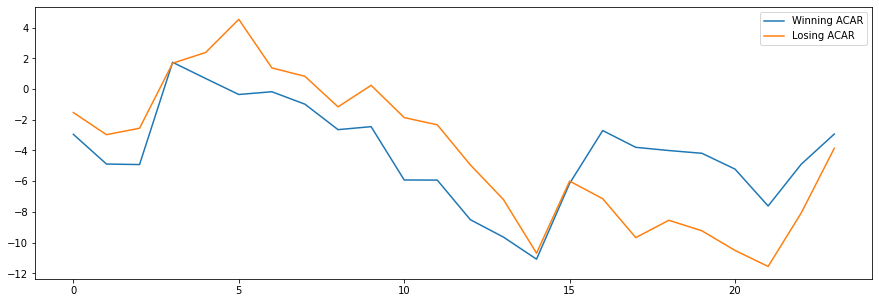

average winning acar =  -4.144193470231562  and losing acar =  -4.112972854078291
the month is  0 acar_w is  -2.9479409357030937  acar_l is  -1.5283438751785308  T_val is  [0.0037721031713103537, 0.4985413352882492]  t_profit  [-0.014733250651793033, 0.5056971017293854]  t_loss  [-0.004794900362458147, 0.5018541752827472]
the month is  1 acar_w is  -4.88180508668847  acar_l is  -2.968637141426813  T_val is  [0.003900936856133149, 0.4984915158409753]  t_profit  [-0.018277282692248608, 0.5070673646537228]  t_loss  [-0.007217243569977478, 0.5027908737651917]
the month is  2 acar_w is  -4.916479997251587  acar_l is  -2.551837001932964  T_val is  [0.004039662822975607, 0.4984378711211248]  t_profit  [-0.012816819096688796, 0.5049560987452686]  t_loss  [-0.005771431486525107, 0.502231792966694]
the month is  3 acar_w is  1.7452688580432065  acar_l is  1.6837256098966942  T_val is  [-8.481239558576601e-05, 0.5000327968702942]  t_profit  [0.003604093738361726, 0.4986063038743098]  t_loss  [0.0

In [41]:
plotar(y)
plotacar(y)
a2=tstat(y)

In [42]:
z=acar_values(five_year)

01-01-2000 31-12-2009
Winning CAR at End of formation period 31-12-2004 is  78.31997658989691
Losing CAR at End of formation period 31-12-2004 is  -53.26122342222489
Winning CAR at End of Testing period 31-12-2009 is  -7.596874083685505
Losing CAR at End of Testing period 31-12-2009 is  -34.3862168851146
01-01-2005 31-12-2014
Winning CAR at End of formation period 31-12-2009 is  75.01663014841246
Losing CAR at End of formation period 31-12-2009 is  -84.1236793116116
Winning CAR at End of Testing period 31-12-2014 is  -19.349278138597175
Losing CAR at End of Testing period 31-12-2014 is  5.190909019483279
01-01-2010 31-12-2019
Winning CAR at End of formation period 31-12-2014 is  84.05389448041248
Losing CAR at End of formation period 31-12-2014 is  -79.9781506450768
Winning CAR at End of Testing period 31-12-2019 is  9.051866810466331
Losing CAR at End of Testing period 31-12-2019 is  -5.294453960325321


In [119]:
z

{'ACARWinning': [1.6134394175858933,
  2.900241257909032,
  3.364085777974635,
  8.841375066959886,
  6.671054337688674,
  4.013788509110179,
  10.72234645003647,
  12.132986472693235,
  7.126394049054592,
  3.6147094070569703,
  1.028616515124294,
  -0.19605492333044103,
  -3.2914725801371385,
  -3.8867092626238366,
  -3.443619563020208,
  0.7132400214675828,
  0.5882369977953879,
  -4.010039109356229,
  -4.150892096520166,
  -5.436453461371703,
  -3.6538474845344653,
  -3.6972787492593873,
  -8.254514269167426,
  -11.12047462341787,
  -6.864573065602176,
  -4.3543880834255715,
  -4.45529811592183,
  -1.7315553070049805,
  -4.920576601391179,
  -4.015716851208651,
  -5.947326536361259,
  -6.994087462650342,
  -5.751029445115705,
  -5.846384116409574,
  -3.0598274973393345,
  1.8715556993194085,
  -5.028421821413839,
  -6.75230769704195,
  -10.516664483826462,
  -7.375887448460219,
  -9.669884227114432,
  -13.278536221528064,
  -17.637016601596038,
  -17.285472058064467,
  -20.93820110

[]


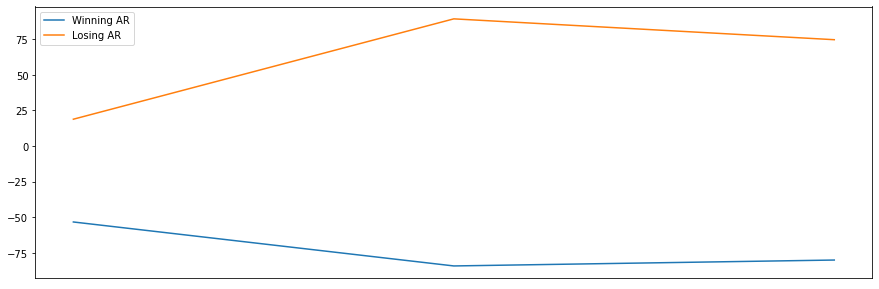

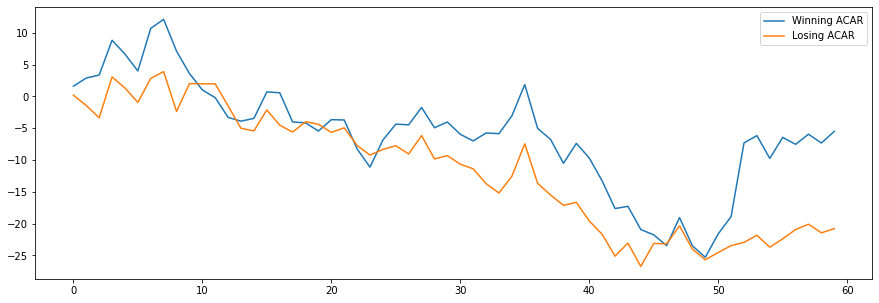

average winning acar =  -5.964761803938783  and losing acar =  -11.496587275318886
the month is  0 acar_w is  1.6134394175858933  acar_l is  0.20293499757861566  T_val is  [-0.003986669982116718, 0.5014094950888992]  t_profit  [0.007492878503794002, 0.49735090458161135]  t_loss  [0.0007228746016875716, 0.49974442526698715]
the month is  1 acar_w is  2.900241257909032  acar_l is  -1.4250833836732502  T_val is  [-0.010993179998069995, 0.5038865586408343]  t_profit  [0.009653456958034417, 0.49658706707276346]  t_loss  [-0.005609279752173244, 0.5019831642756486]
the month is  2 acar_w is  3.364085777974635  acar_l is  -3.3574166476891336  T_val is  [-0.015366882656801448, 0.5054326927551404]  t_profit  [0.013295433661898276, 0.495299562067245]  t_loss  [-0.009410090875195181, 0.5033268958865313]
the month is  3 acar_w is  8.841375066959886  acar_l is  3.069027567746707  T_val is  [-0.00848758962774362, 0.5030007620482321]  t_profit  [0.016226715106282583, 0.4942633674664022]  t_loss  [0.00

In [43]:
plotar(z)
plotacar(z)
a3=tstat(z)

In [44]:
!pip install -q latextable
from tabulate import tabulate
from texttable import Texttable
import latextable
def tables(x):
  rows=[["Months","ACAR_Win","ACAR_Lose","t_total","p_total","t_profit","p_profit","t_loss","p_loss"]]
  for i in range(len(x["acl"])):
    rows.append([i+1,x["acw"][i],x["acl"][i],x["t_Val"][i][0],x["t_Val"][i][1],x["t_profit"][i][0],x["t_profit"][i][1],x["t_loss"][i][0],x["t_loss"][i][1]])
  table = Texttable()
  table.set_cols_align(["c"] * 9)
  table.set_deco(Texttable.HEADER | Texttable.VLINES)
  table.add_rows(rows)
  print('\nTabulate Latex:')
  print(tabulate(rows, headers='firstrow', tablefmt='latex'))

In [45]:
tables(a3)


Tabulate Latex:
\begin{tabular}{rrrrrrrrr}
\hline
   Months &   ACAR\_Win &   ACAR\_Lose &      t\_total &   p\_total &     t\_profit &   p\_profit &       t\_loss &   p\_loss \\
\hline
        1 &   1.61344  &    0.202935 & -0.00398667  &  0.501409 &  0.00749288  &   0.497351 &  0.000722875 & 0.499744 \\
        2 &   2.90024  &   -1.42508  & -0.0109932   &  0.503887 &  0.00965346  &   0.496587 & -0.00560928  & 0.501983 \\
        3 &   3.36409  &   -3.35742  & -0.0153669   &  0.505433 &  0.0132954   &   0.4953   & -0.00941009  & 0.503327 \\
        4 &   8.84138  &    3.06903  & -0.00848759  &  0.503001 &  0.0162267   &   0.494263 &  0.00754064  & 0.497334 \\
        5 &   6.67105  &    1.32914  & -0.0076492   &  0.502704 &  0.0138096   &   0.495118 &  0.00263547  & 0.499068 \\
        6 &   4.01379  &   -0.926098 & -0.00660408  &  0.502335 &  0.0108011   &   0.496181 & -0.00142659  & 0.500504 \\
        7 &  10.7223   &    2.85268  & -0.0112774   &  0.503987 &  0.0252562   &   0.49

In [46]:
len(a1["acl"])

12

['Non - Ferrous Metals', 'Banks', 'Engineering Services', 'Leisure Services', 'Aerospace & Defense', 'Transport Infrastructure', 'Capital Markets', 'Telecom - Services', 'Telecom -  Equipment & Accessories', 'Other Consumer Services', 'Cigarettes & Tobacco Products', 'Other Utilities', 'Other Construction Materials', 'Oil', 'Agricultural, Commercial & Construction Vehicles', 'Construction', 'Diversified FMCG', 'Electrical Equipment', 'Consumable Fuels', 'Realty', 'Gas', 'Media', 'Personal Products', 'Petroleum Products', 'Minerals & Mining', 'Fertilizers & Agrochemicals', 'Transport Services', 'Insurance', 'Healthcare Services', '-', 'Textiles & Apparels', 'Chemicals & Petrochemicals', 'Paper, Forest & Jute Products', 'Diversified', 'Metals & Minerals Trading', 'Pharmaceuticals & Biotechnology', 'IT - Services', 'Industrial Products', 'Beverages', 'IT - Software', 'Retailing', 'Ferrous Metals', 'Entertainment', 'Healthcare Equipment & Supplies', 'Finance', 'Consumer Durables', 'Househo

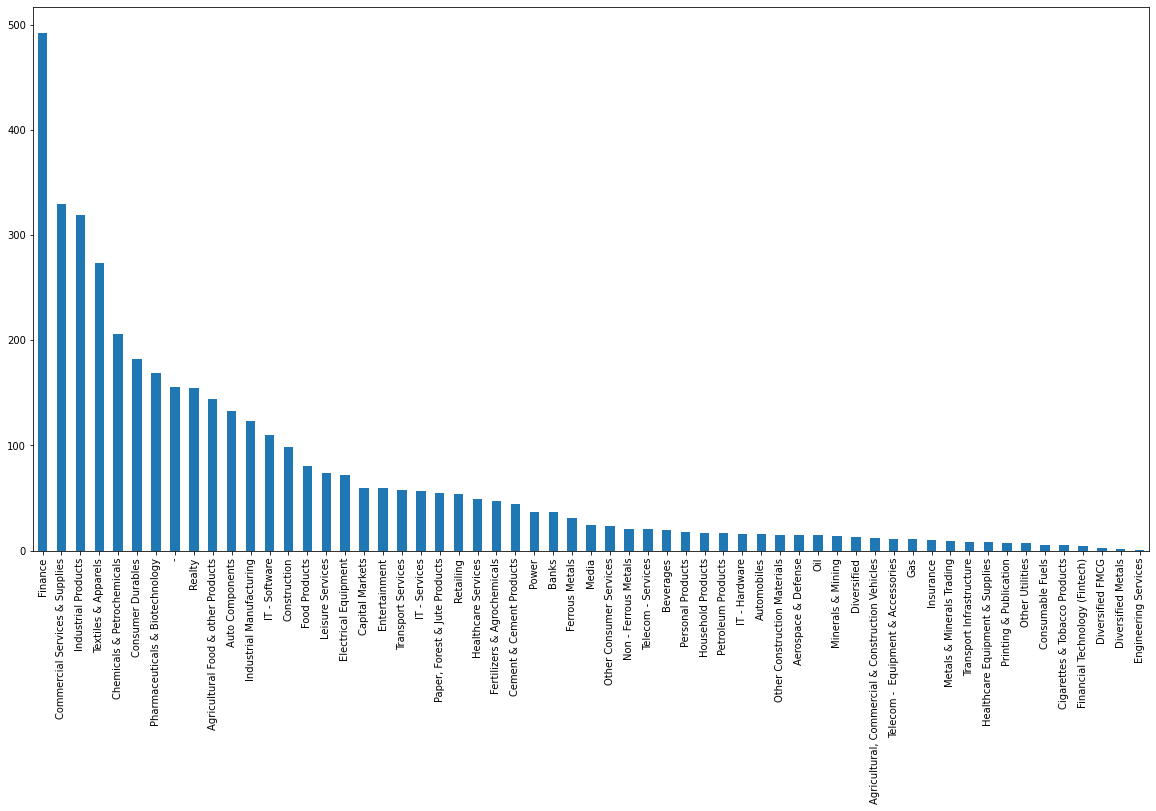

In [67]:
df=pd.read_csv('/content/drive/MyDrive/NeuroEcon Project/Equity.csv')
inds=list(set(df["Industry New Name"].tolist()))
print(inds)
count = df["Industry New Name"].value_counts()
count.plot(kind="bar", figsize=(20,10))

In [103]:
ind=[(count[count==i].index[0]) for i in count if i>20 ]
print(ind)

['Finance', 'Commercial Services & Supplies', 'Industrial Products', 'Textiles & Apparels', 'Chemicals & Petrochemicals', 'Consumer Durables', 'Pharmaceuticals & Biotechnology', '-', 'Realty', 'Agricultural Food & other Products', 'Auto Components', 'Industrial Manufacturing', 'IT - Software', 'Construction', 'Food Products', 'Leisure Services', 'Electrical Equipment', 'Capital Markets', 'Capital Markets', 'Transport Services', 'IT - Services', 'Paper, Forest & Jute Products', 'Retailing', 'Healthcare Services', 'Fertilizers & Agrochemicals', 'Cement & Cement Products', 'Power', 'Power', 'Ferrous Metals', 'Media', 'Other Consumer Services', 'Non - Ferrous Metals', 'Non - Ferrous Metals']


In [105]:
ind.remove('Media')

In [107]:
ind=list(set(ind))
print(ind)

['Non - Ferrous Metals', 'Leisure Services', 'Capital Markets', 'Other Consumer Services', 'Construction', 'Electrical Equipment', 'Realty', '-', 'Transport Services', 'Fertilizers & Agrochemicals', 'Healthcare Services', 'Textiles & Apparels', 'Chemicals & Petrochemicals', 'Paper, Forest & Jute Products', 'Pharmaceuticals & Biotechnology', 'IT - Services', 'Industrial Products', 'IT - Software', 'Retailing', 'Ferrous Metals', 'Finance', 'Consumer Durables', 'Food Products', 'Industrial Manufacturing', 'Cement & Cement Products', 'Commercial Services & Supplies', 'Agricultural Food & other Products', 'Auto Components', 'Power']


In [132]:
carmap={}
acarmap={}
for i in ind:
  print(i)
  a=acar_values(two_year,i)
  chcar=[(a["ChangeARP"][j]-a["ChangeARL"][j]) for j in range(len(a["ChangeARP"]))]
  chacar=[(a["ACARWinning"][j]-a["ACARLosing"][j]) for j in range(len(a["ACARLosing"]))]
  print(chcar)
  carmap[i]=chcar
  acarmap[i]=chacar                                                         

Non - Ferrous Metals
01-01-2000 31-12-2003
Non - Ferrous Metals
winning protfolio len  1  losing is  0
Winning CAR at End of formation period 31-12-2001 is  -1.2993466194169043
Losing CAR at End of formation period 31-12-2001 is  0.0
Winning CAR at End of Testing period 31-12-2003 is  60.066039829775185
Losing CAR at End of Testing period 31-12-2003 is  0.0
01-01-2002 31-12-2005
Non - Ferrous Metals
winning protfolio len  1  losing is  0
Winning CAR at End of formation period 31-12-2003 is  58.56235146641867
Losing CAR at End of formation period 31-12-2003 is  0.0
Winning CAR at End of Testing period 31-12-2005 is  -26.489360739433433
Losing CAR at End of Testing period 31-12-2005 is  0.0
01-01-2004 31-12-2007
Non - Ferrous Metals
winning protfolio len  1  losing is  0
Winning CAR at End of formation period 31-12-2005 is  -26.848545248206747
Losing CAR at End of formation period 31-12-2005 is  0.0
Winning CAR at End of Testing period 31-12-2007 is  -13.320725350195952
Losing CAR at End

In [133]:
carmap['Power']

[-147.37320899083699,
 -10.157941928183174,
 14.5691924663607,
 -63.57375801709907,
 -18.92082817367361,
 -88.02364791794855,
 -60.25078963258852,
 -46.95399346649768,
 22.94957886216052]

In [134]:
carmap["Realty"]

[0.0,
 0.0,
 0.0,
 -118.99183373708681,
 -168.95548101068897,
 -128.30398874412094,
 -62.71988140993946,
 -58.83875875782433,
 1.5833046586724606]

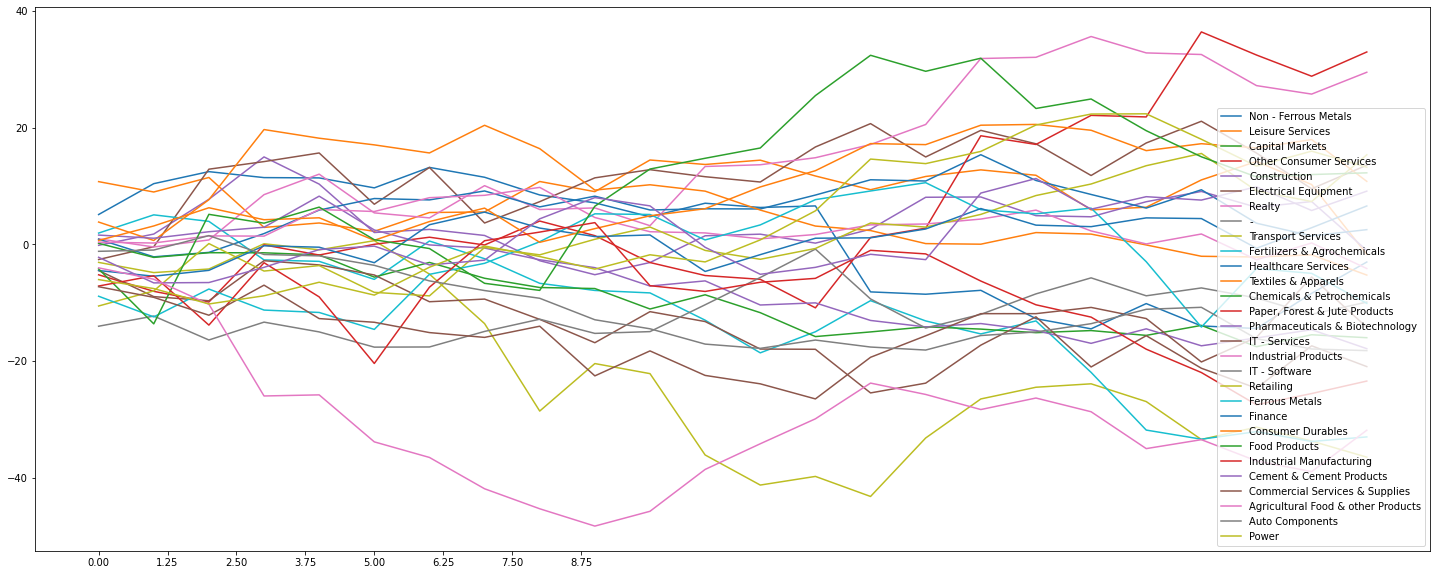

In [136]:
import matplotlib.pyplot as plt
import numpy as np
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(25)
for i in acarmap:
  plt.plot(acarmap[i],label =i)
  xax = np.arange(0,len(carmap[i]),len(carmap[i])/4- 1)
  plt.xticks(xax)
plt.legend()
plt.show()

In [47]:
industry("Power")

Power


['CESC.csv',
 'RELINFRA.csv',
 'TATAPOWER.csv',
 'VEERENRGY.csv',
 'RELTD.csv',
 'NAVA.csv',
 'NLCINDIA.csv',
 'GIPCL.csv',
 'SURANAT&P.csv',
 'SRMENERGY.csv',
 'GLOBUSCON.csv',
 'ENERGYDEV.csv',
 'PTC.csv',
 'NTPC.csv',
 'JPPOWER.csv',
 'TORNTPOWER.csv',
 'INDOWIND.csv',
 'POWERGRID.csv',
 'RPOWER.csv',
 'ADANIPOWER.csv',
 'NHPC.csv',
 'RTNPOWER.csv',
 'JSWENERGY.csv',
 'SJVN.csv',
 'GREENPOWER.csv',
 'KARMAENG.csv',
 'AMTL.csv',
 'WAAREERTL.csv',
 'INDRENEW.csv',
 'GITARENEW.csv',
 'ADANITRANS.csv',
 'WAAREE.csv',
 'KPEL.csv',
 'WAA.csv',
 'ADANIGREEN.csv',
 'KPIGREEN.csv',
 'INA.csv']

In [ ]:
a=acar_values(one_year,"Power")